In [4]:
import pandas as pd

In [4]:
# airlines_country=pd.read_csv('Airlines.csv')
# airlines_country.head()

,#Name,IATA,ICAO,Country,Active
0,Indonesa Air Aisa X,ZM,IDX,Indonesia,Y
1,Alghanim,ZL,KYA,United States,Y
2,Norwegian Air International,ZK,IBK,Norway,Y
3,Boliviana de Aviacion,ZI,BOV,Bolivia,Y
4,AtlasGlobal Ukraine,ZH,UJX,Ukraine,Y


In [39]:
# airlines_country.loc[airlines_country['#Name'].str.lower().str.contains('brit')]
wiki_tables=pd.read_html('https://en.wikipedia.org/wiki/List_of_airline_codes')
airlines_country=wiki_tables[0]
airlines_country.head()

,IATA,ICAO,Airline,Call sign,Country/Region,Comments
0,EVY,NaN,"34 Squadron, Royal Australian Air Force",Australia,NaN,NaN
1,NaN,GNL,135 Airways,GENERAL,United States,NaN
2,1A,NaN,Amadeus IT Group S.A.,NaN,Global,GDS and airline hosting system (CRS/PSS)
3,1B,NaN,Sabre travel network Asia-Pacific (ex-Abacus),NaN,APAC,Regional distribution
4,1E,NaN,Travelsky,NaN,China,Local distribution system and hosting system (...


In [5]:
airlines_safety=pd.read_csv('airline-safety.csv')
airlines_safety.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


LinregressResult(slope=0.1659770727805918, intercept=2.9335217275393233, rvalue=0.4030088296410955, pvalue=0.0020730165648094167, stderr=0.05129213961942554)

LinregressResult(slope=0.1554306825785271, intercept=2.8893546204698788e-09, rvalue=0.3692427362380597, pvalue=0.005101586295444441, stderr=0.05323524618900776)

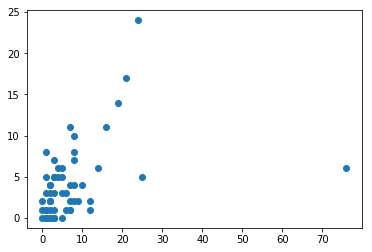

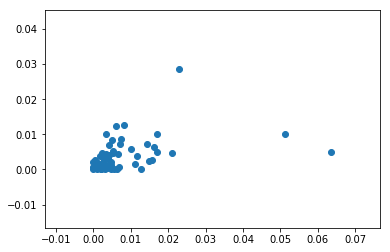

In [13]:
%matplotlib inline
import scipy.stats as sts
import matplotlib.pyplot as plt
display(sts.linregress(airlines_safety['incidents_85_99'], airlines_safety['incidents_00_14']))

airlines_safety['incidents_85_99_norm']=airlines_safety['incidents_85_99']/airlines_safety['avail_seat_km_per_week']
airlines_safety['incidents_00_14_norm']=airlines_safety['incidents_00_14']/airlines_safety['avail_seat_km_per_week']

display(sts.linregress(airlines_safety['incidents_85_99_norm'], airlines_safety['incidents_00_14_norm']))

plt.scatter(airlines_safety['incidents_85_99'], airlines_safety['incidents_00_14'])
plt.show()

plt.scatter(airlines_safety['incidents_85_99_norm']*1000000, airlines_safety['incidents_00_14_norm']*1000000)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ea6133978>,
      dtype=object)

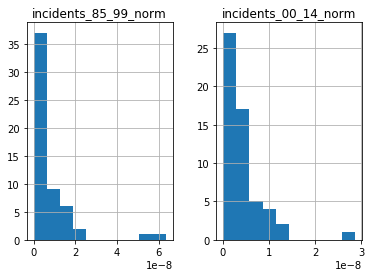

In [14]:
airlines_safety[['incidents_85_99_norm', 'incidents_00_14_norm']].hist()

In [136]:
import numpy as np
import fuzzywuzzy

In [38]:
from fuzzywuzzy import process, fuzz

In [90]:
fuzzy_list=[]
for each_word in airlines_safety['airline']:
    fuzzy_list.append((each_word, *process.extractOne(each_word, airlines_country['Airline'])))
                      

In [53]:
('American*', ('Aeroexpreso Interamericano', 90, 330)),
('Delta / Northwest*', ('Avio Delta', 86, 1463)),
('Japan Airlines', ('PAN Air', 90, 4250)),
('LAN Airlines', ('Lao Airlines', 92, 3562)),
('SAS*', ('Kansas State University', 90, 3408)),
('Sri Lankan / AirLanka', ('Lankan Cargo', 86, 3558)),
('Saudi Arabian', ('Royal Saudi Air Force', 86, 4713)),
('SWISS*', ('Heliswiss', 90, 3139)),
('TAM', ('Aerotaxi Grupo Tampico', 90, 1013)),
('TAP - Air Portugal', ('34 Squadron, Royal Australian Air Force', 86, 0)),
('Thai Airways', ('Tair Airways', 92, 5448)),
('United / Continental*',
('Chief of Staff, United States Air Force', 86, 1814)),
('US Airways / America West*', ('Airways', 90, 792)),

(('US Airways / America West*', ('Airways', 90, 792)),)

In [124]:
match=pd.DataFrame(fuzzy_list, columns=['check', 'match', 'score', 'old_index'])
# match[match.iloc[:, 2]<=90]
manual_map={
    'American*': 'American Airlines', 
    'Delta / Northwest*': 'Delta Air Lines', 
    'Japan Airlines': 'ZIPAIR Tokyo', 
    'LAN Airlines': 'LATAM Chile', 
    'SAS*': 'Scandinavian Airlines', 
    'Sri Lankan / AirLanka': 'SriLankan Airlines', 
    'Saudi Arabian': 'Saudia', 
    'SWISS*': 'Swissair', 
    'TAM': 'LATAM Brasil', 
    'TAP - Air Portugal': 'TAP Portugal', 
    'Thai Airways': 'Thai Airways International', 
    'United / Continental*': 'United Airlines', 
    'US Airways / America West*': 'US Airways'
    }
match['manual']=match.iloc[:, 0].map(manual_map)
display(match['manual'].count())
display(len(manual_map))

13

13

In [145]:
match['final']=match.apply(lambda x: x['manual'] if not pd.isna(x['manual']) else x['match'], axis=1)
match=pd.merge(match[['check', 'final']], airlines_country, left_on='final', right_on='Airline')
match[['check', 'Airline', 'Country/Region']].to_csv('fuzzy.csv', index=False)

In [149]:
pd.merge(match[['check', 'final']], airlines_country, left_on='final', right_on='Airline')

,check,final,IATA,ICAO,Airline,Call sign,Country/Region,Comments
0,Aer Lingus,Aer Lingus,EI,EIN,Aer Lingus,SHAMROCK,Ireland,NaN
1,Aeroflot*,Aeroflot Russian Airlines,SU,AFL,Aeroflot Russian Airlines,AEROFLOT,Russia,NaN
2,Aerolineas Argentinas,Aerolíneas Argentinas,AR,ARG,Aerolíneas Argentinas,ARGENTINA,Argentina,NaN
3,Aeromexico*,Aeroméxico,AM,AMX,Aeroméxico,AEROMEXICO,Mexico,NaN
4,Air Canada,Air Canada,AC,ACA,Air Canada,AIR CANADA,Canada,NaN
5,Air France,Air France,AF,AFR,Air France,AIRFRANS,France,NaN
6,Air India*,Air India Limited,AI,AIC,Air India Limited,AIRINDIA,India,NaN
7,Air New Zealand*,Air New Zealand,NZ TE,ANZ,Air New Zealand,NEW ZEALAND,New Zealand,"""NZ"" used by New Zealand National Airways Corp..."
8,Alaska Airlines*,"Alaska Airlines, Inc.",AS,ASA,"Alaska Airlines, Inc.",ALASKA,United States,NaN
9,Alitalia,Alitalia,AZ,AZA,Alitalia,ALITALIA,Italy,NaN


In [170]:
calc=pd.merge(airlines_safety, match, left_on='airline', right_on='check')
US_only=calc[calc['Country/Region']=='United States']
US_only['total_fatalities']=US_only['fatalities_85_99']+US_only['fatalities_00_14']
US_only['total_fatalities_norm']=US_only['total_fatalities']/US_only['avail_seat_km_per_week']#/US_only['avail_seat_km_per_week'].sum()
(US_only['total_fatalities_norm']*US_only['avail_seat_km_per_week']).sum()/US_only['avail_seat_km_per_week'].sum()

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/kevinlee/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


6.662897988952029e-08

In [177]:
country_continent=pd.read_csv('country_continent.csv')

In [179]:
fuzzy_list=[]
for each_word in match['Country/Region']:
    fuzzy_list.append((each_word, *process.extractOne(each_word, country_continent['Country_Name'])))          

In [180]:
fuzzy_list

[('Ireland', 'Ireland', 100, 110),
 ('Russia', 'Russian Federation', 90, 191),
 ('Argentina', 'Argentina, Argentine Republic', 90, 10),
 ('Mexico', 'Mexico, United Mexican States', 90, 143),
 ('Canada', 'Canada', 100, 38),
 ('France', 'France, French Republic', 90, 77),
 ('India', 'India, Republic of', 90, 106),
 ('New Zealand', 'New Zealand', 100, 163),
 ('United States', 'United States Minor Outlying Islands', 90, 171),
 ('Italy', 'Italy, Italian Republic', 90, 112),
 ('Japan', 'Japan', 100, 115),
 ('United States', 'United States Minor Outlying Islands', 90, 171),
 ('Austria', 'Austria, Republic of', 90, 12),
 ('Colombia', 'Colombia, Republic of', 90, 49),
 ('United Kingdom',
  'United Kingdom of Great Britain & Northern Ireland',
  90,
  243),
 ('Hong Kong', 'Hong Kong, Special Administrative Region of China', 90, 103),
 ('Taiwan', 'Taiwan', 100, 46),
 ('Germany', 'Germany, Federal Republic of', 90, 87),
 ('Panama', 'Panama, Republic of', 90, 177),
 ('United States', 'United States

In [ ]:
('South Korea', 'Antarctica (the territory South of 60 deg S)', 86, 2),
('Sweden, Denmark and Norway',
  'South Georgia and the South Sandwich Islands',
  86,
  73),
('United States', 'United States Minor Outlying Islands', 90, 171),

In [181]:
match=pd.DataFrame(fuzzy_list, columns=['check', 'match', 'score', 'old_index'])
# match[match.iloc[:, 2]<=90]
manual_map={
    'South Korea': 'Korea, Republic of', 
    'Sweden, Denmark and Norway': 'Sweden, Kingdom of', 
    'United States': 'United States of America', 
    }
match['manual']=match.iloc[:, 0].map(manual_map)
display(match['manual'].count())
display(len(manual_map))

9

3

In [182]:
('South Korea', 'Antarctica (the territory South of 60 deg S)', 86, 2),
('Sweden, Denmark and Norway',
  'South Georgia and the South Sandwich Islands',
  86,
  73),
('United States', 'United States Minor Outlying Islands', 90, 171),

(('United States', 'United States Minor Outlying Islands', 90, 171),)

In [183]:
match

,check,match,score,old_index,manual
0,Ireland,Ireland,100,110,NaN
1,Russia,Russian Federation,90,191,NaN
2,Argentina,"Argentina, Argentine Republic",90,10,NaN
3,Mexico,"Mexico, United Mexican States",90,143,NaN
4,Canada,Canada,100,38,NaN
5,France,"France, French Republic",90,77,NaN
6,India,"India, Republic of",90,106,NaN
7,New Zealand,New Zealand,100,163,NaN
8,United States,United States Minor Outlying Islands,90,171,United States of America
9,Italy,"Italy, Italian Republic",90,112,NaN


In [184]:
country_continent

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0
...,...,...,...,...,...,...
257,Africa,AF,"Zambia, Republic of",ZM,ZMB,894.0
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN


In [185]:
match['final']=match.apply(lambda x: x['manual'] if not pd.isna(x['manual']) else x['match'], axis=1)
match=pd.merge(match[['check', 'final']], country_continent, left_on='final', right_on='Country_Name')
match[['check', 'Country_Name', 'Continent_Name']].to_csv('fuzzy_continent.csv', index=False)